# Goal

Define an inital broad set of cc related genes starting from MSigDB.

Simple keywords are used to find all relevants genesets.

In [2]:
# Autorelaod
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
os.chdir("/home/gdallagl/myworkdir/ESMSec")
print(f"Working directory successfully changed to: {os.getcwd()}")

import utils.my_functions as mf
import utils.dataset_functions as dataf

config_file="/home/gdallagl/myworkdir/ESMSec/config/config.yaml"
config = mf.load_config(config_file)

mf.set_all_seeds(config["random_seed"])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Working directory successfully changed to: /home/gdallagl/myworkdir/ESMSec
Seeds set successfully to 42 for random, numpy, and PyTorch (if used).


# Keywords

In [3]:
# Updated keywords pattern with word boundaries to avoid false matches
KEYWORDS_PATTERN = "|".join([
    "_PROLIFERATION_", #avoid "proliferative" "proliferator"
    "_CYCLING",  # avoid "recycling"
    "CELL_CYCLE",
    "_CC_", "_G1_", "_S_PHASE_", "_G2_", "_M_PHASE_", # avoid "aCCumbens"
    "MITOSIS", "MITOTIC",
    "CDK",
    "CHECKPOINT"
])

# Exclusion pattern
EXCLUSION_PATTERN = r"MEIOTIC|MEIOSIS|FATTY_ACID_CYCLING_MODEL"


# Read MSigDB

In [4]:
### 1) Transform jsons into df
df_genesets = dataf.load_json_folder_to_df(config["data_paths"]["MSigDB_all_data"])
df_genesets = df_genesets.drop_duplicates(subset=['set_name'], keep='first')
display(df_genesets.head(2)); print(df_genesets.shape)

,set_name,collection,systematicName,pmid,exactSource,externalDetailsURL,msigdbURL,geneSymbols,filteredBySimilarity,externalNamesForSimilarTerms,source_file
0,MIR153_5P,C3:MIR:MIRDB,M30412,31504780,,http://mirdb.org/cgi-bin/mature_mir.cgi?name=h...,https://www.gsea-msigdb.org/gsea/msigdb/human/...,"[A1CF, AAK1, AASDHPPT, ABCE1, ABHD2, ABI2, ACB...",[],[],c3.mir.mirdb.v2025.1.Hs.json
1,MIR8485,C3:MIR:MIRDB,M30413,31504780,,http://mirdb.org/cgi-bin/mature_mir.cgi?name=h...,https://www.gsea-msigdb.org/gsea/msigdb/human/...,"[AAK1, ABHD18, ABL2, ABLIM1, ACVR1, ACVR2B, AC...",[],[],c3.mir.mirdb.v2025.1.Hs.json


(35134, 11)


In [5]:
### 2) Select only geneset related to interested fiedl
mask_include = df_genesets["set_name"].str.contains(KEYWORDS_PATTERN, case=False, regex=True)
mask_exclude = df_genesets["set_name"].str.contains(EXCLUSION_PATTERN, case=False, regex=True)
df_genesets_cell_cycle = df_genesets[mask_include & ~mask_exclude].copy()

NUMBER_POSITIVE_GENESETS = df_genesets_cell_cycle.shape[0]
print("Number of positive genesets:", NUMBER_POSITIVE_GENESETS)
list(df_genesets_cell_cycle['set_name'].sort_values())

Number of positive genesets: 291


['ACOSTA_PROLIFERATION_INDEPENDENT_MYC_TARGETS_DN',
 'ACOSTA_PROLIFERATION_INDEPENDENT_MYC_TARGETS_UP',
 'BENPORATH_CYCLING_GENES',
 'BIOCARTA_CDK5_PATHWAY',
 'BIOCARTA_G1_PATHWAY',
 'BIOCARTA_G2_PATHWAY',
 'BOYAULT_LIVER_CANCER_SUBCLASS_G1_DN',
 'BOYAULT_LIVER_CANCER_SUBCLASS_G1_UP',
 'CHIANG_LIVER_CANCER_SUBCLASS_PROLIFERATION_DN',
 'CHIANG_LIVER_CANCER_SUBCLASS_PROLIFERATION_UP',
 'DONATO_CELL_CYCLE_TRETINOIN',
 'EGUCHI_CELL_CYCLE_RB1_TARGETS',
 'FISCHER_G1_S_CELL_CYCLE',
 'FISCHER_G2_M_CELL_CYCLE',
 'FUJIWARA_PARK2_HEPATOCYTE_PROLIFERATION_DN',
 'FUJIWARA_PARK2_HEPATOCYTE_PROLIFERATION_UP',
 'GAVISH_3CA_MALIGNANT_METAPROGRAM_2_CELL_CYCLE_G1_S',
 'GAVISH_3CA_METAPROGRAM_B_CELLS_CELL_CYCLE',
 'GAVISH_3CA_METAPROGRAM_CD4_T_CELLS_CELL_CYCLE',
 'GAVISH_3CA_METAPROGRAM_CD8_T_CELLS_CELL_CYCLE',
 'GAVISH_3CA_METAPROGRAM_ENDOTHELIAL_CELL_CYCLE',
 'GAVISH_3CA_METAPROGRAM_EPITHELIAL_CELL_CYCLE',
 'GAVISH_3CA_METAPROGRAM_FIBROBLASTS_CELL_CYCLE',
 'GAVISH_3CA_METAPROGRAM_MACROPHAGES_CELL_CYCLE'

n_genes
5       18
6       17
7        9
8       12
9       13
        ..
939      1
1114     1
1348     1
1423     1
1705     1
Name: count, Length: 129, dtype: int64

<Axes: ylabel='number genesets'>

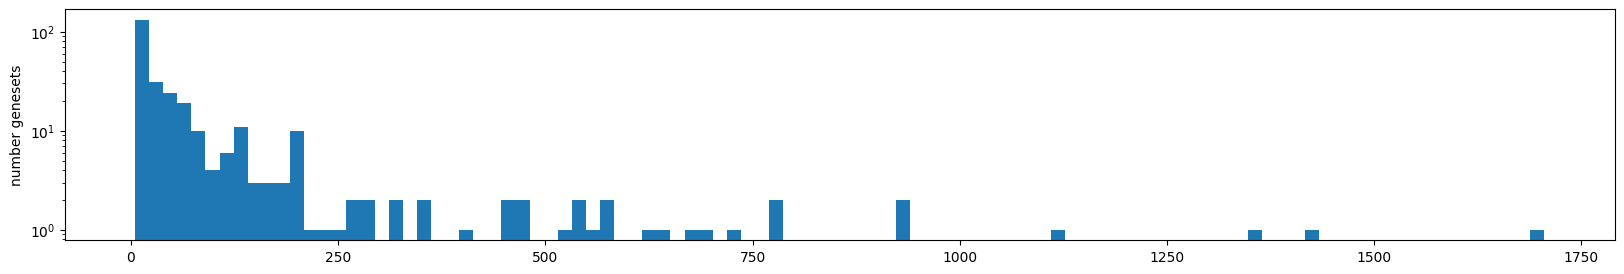

In [6]:
# Number of genesets containing that number of genes
df_genesets_cell_cycle["n_genes"] = df_genesets_cell_cycle.geneSymbols.apply(lambda x: len(x))
display(df_genesets_cell_cycle.n_genes.value_counts().sort_index())#.plot(kind="bar", figsize=(20, 3), ylabel="number genesets")
df_genesets_cell_cycle.n_genes.plot(kind="hist", figsize=(20, 3), ylabel="number genesets", bins=100, logy=True)

# Count in how many genesets each gene is present (*Prevalence* metric)


Number of positive genes: 7288


,gene,geneset_count,is_guaranteed
0,CDK1,97,False
1,CCNB1,83,False
2,PLK1,75,False
3,BIRC5,74,False
4,RB1,73,False
...,...,...,...
7283,SCAI,1,False
7284,SCML1,1,False
7285,SERINC5,1,False
7286,SIRPG,1,False


['CDK1', 'CCNB1', 'PLK1', 'BIRC5', 'RB1', 'E2F1', 'AURKB', 'CDK2', 'CDKN1A', 'CCND1', 'CDC20', 'MAD2L1', 'CDC6', 'UBE2C', 'CDCA8', 'CCNE1', 'TP53', 'CCNE2', 'CENPF', 'NDC80', 'CHEK1', 'INCENP', 'AURKA', 'BUB1', 'CCNA2', 'SKA1', 'MAD1L1', 'FBXO5', 'CHEK2', 'ZWINT', 'CDKN1B', 'CDC25C', 'CDK4', 'RAD21', 'WEE1', 'FZR1', 'DTL', 'ESPL1', 'SKA3', 'CDC23', 'CCNB2', 'BRCA1', 'CDC25A', 'CDC16', 'BUB1B', 'ANAPC7', 'E2F3', 'E2F2', 'ATM', 'ORC1', 'TFDP1', 'CDC7', 'NUSAP1', 'NEK2', 'KNL1', 'TTK', 'NUF2', 'TPR', 'CDC25B', 'CCND3', 'RRM2', 'BUB3', 'TOPBP1', 'SPDL1', 'CENPE', 'CLSPN', 'RPA2', 'DLGAP5', 'ANAPC5', 'CDK5RAP2', 'ANAPC11', 'ANAPC15', 'KNTC1', 'MAD2L1BP', 'ATR', 'DONSON', 'BLM', 'BARD1', 'CCND2', 'PKMYT1', 'PRAP1', 'ZW10', 'SPC25', 'CENPJ', 'CDCA5', 'RRM1', 'MCM2', 'CDC45', 'CDC14B', 'EZH2', 'PCNA', 'RBBP8', 'TPX2', 'CDC27', 'DYNC1LI1', 'CDK6', 'RBL1', 'KIF23', 'TRIP13', 'KIF20B', 'CCNA1', 'XRCC3', 'HUS1', 'MRE11', 'ABRAXAS1', 'TICRR', 'MCM6', 'UBE2S', 'SPC24', 'ZWILCH', 'STIL', 'MDM2', 'CHM

<Axes: xlabel='number of genesets in which one gene appears', ylabel='number genes'>

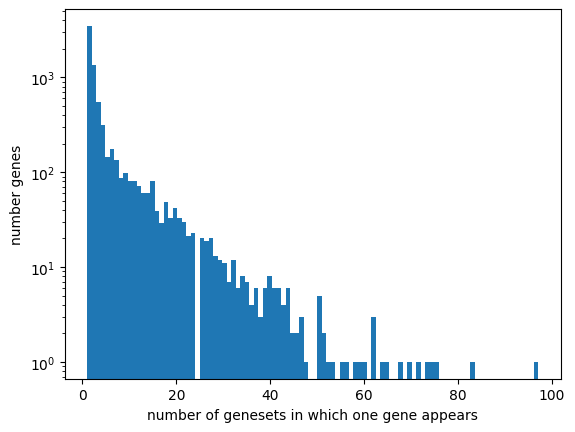

In [7]:
gene_counts_df = dataf.gene_set_counts(df_genesets_cell_cycle)

# create a label for later
gene_counts_df["is_guaranteed"] = False

print("Number of positive genes:", gene_counts_df.shape[0])
display(gene_counts_df)
print(gene_counts_df.gene.to_list())
# plot ditruction
gene_counts_df.geneset_count.plot(kind="hist", logy=True, bins=100, ylabel="number genes", xlabel="number of genesets in which one gene appears")

# Add Guaranteed genes

Read them from Julie's csv file.

Add them with:
- max-freq IF they are not present in original genesets
- same freq IF they are alredy present in the genesets

In [9]:
### 1) Read spefic csv
guarented_genes_df = pd.read_csv(config["data_paths"]["guaranted_positive_genes"], sep='\t')

### 2) Extarct the single gene names
all_values = guarented_genes_df.to_numpy().flatten().tolist()
all_values = [x for x in all_values if pd.notna(x)] # remove nan
all_values = list(set(all_values)) # remove duplicated
print("Number of guaranted genes: ", len(all_values))

# Find genes in A but NOT in B
genes_guaranted = set(all_values)
genes_original = set(gene_counts_df['gene'])
genes_in_guaranted_only = genes_guaranted.difference(genes_original)
genes_in_intersection = genes_guaranted.intersection(genes_original)
print(f"Genes in guarented_genes_df only: {len(genes_in_guaranted_only)} \n{genes_in_guaranted_only}")
#gene_counts_df[gene_counts_df.gene.isin(genes_in_intersection)].geneset_count.plot(kind="hist", bins=NUMBER_POSITIVE_GENESETS)

### 3) Create new df with NEW genes
    # the one that oerlaps are alredy rpesent and will get the same freqeuncy
guarented_genes_df = pd.DataFrame({
    'gene': list(genes_in_guaranted_only),
    'geneset_count': max(gene_counts_df.geneset_count), # Use as Freq the max (as these genes are guaranted)
    "is_guaranteed": True
})


Number of guaranted genes:  146
Genes in guarented_genes_df only: 6 
{'FAM64A', 'MLF1IP', 'HN1', 'KIAA0101', 'HIST1H4C', 'H2AFZ'}


In [10]:
# append to existing gene_frequency_df
gene_frequency_df = pd.concat([gene_counts_df, guarented_genes_df], ignore_index=True)

# give +1 to freq for the overalpping
gene_frequency_df.loc[gene_frequency_df['gene'].isin(genes_guaranted), 'geneset_count'] = gene_frequency_df.loc[gene_frequency_df['gene'].isin(genes_guaranted), 'geneset_count'] + 1

# Update is_guaranteed for overlapping genes
gene_frequency_df.loc[gene_frequency_df['gene'].isin(genes_guaranted), 'is_guaranteed'] = True

# ATTENTION: Drop duplicates, keeping **the last occurrence** (i.e., from new_genes_df) --< so gurated genes have max freq
#gene_frequency_df = gene_frequency_df.drop_duplicates(subset='gene', keep='last')

# Sort and reset index
gene_frequency_df.sort_values(by=['geneset_count', 'gene'], ascending=[False, True], inplace=True)
gene_frequency_df.reset_index(drop=True, inplace=True)

display(display(gene_frequency_df.head(5)))
print("Total number of genes, after addeding guarated:", gene_frequency_df.shape[0])

,gene,geneset_count,is_guaranteed
0,CDK1,98,True
1,FAM64A,98,True
2,H2AFZ,98,True
3,HIST1H4C,98,True
4,HN1,98,True


None

Total number of genes, after addeding guarated: 7294


# Label "ambiguos" genes

Mark as "ambiguos" genes with too few Gene Sets.

Threshold is min{MIN_NUMBER, PERCENTAGE x total_positive_genesets}

In [11]:
MIN = max([
        config["dataset_creation"]["min_freq_to_be_positive_gene"], 
        int(config["dataset_creation"]["percentage_number_positive_genesets"] * NUMBER_POSITIVE_GENESETS)
    ])
print("Gene is ambiguos if preset in less than:", MIN, "genesets")

# give a label to gene that overcome the thr
gene_frequency_df["label"] = gene_frequency_df.geneset_count.apply(lambda x: 'positive' if x > MIN else 'ambigous')

# add perdcentage
    # If a gene has a count of NUMBER_POSITIVE_GENESETS, that's 100% of all gene sets.
gene_frequency_df['geneset_percent'] = (gene_frequency_df['geneset_count'] / NUMBER_POSITIVE_GENESETS) * 100

display(gene_frequency_df)
print(gene_frequency_df.label.value_counts())
print(f"Only {(100*gene_frequency_df.label.value_counts()['positive']/gene_frequency_df.shape[0]):1f}% are real positives.")

Gene is ambiguos if preset in less than: 7 genesets


,gene,geneset_count,is_guaranteed,label,geneset_percent
0,CDK1,98,True,positive,33.676976
1,FAM64A,98,True,positive,33.676976
2,H2AFZ,98,True,positive,33.676976
3,HIST1H4C,98,True,positive,33.676976
4,HN1,98,True,positive,33.676976
...,...,...,...,...,...
7289,ZSCAN20,1,False,ambigous,0.343643
7290,ZSCAN22,1,False,ambigous,0.343643
7291,ZSCAN9,1,False,ambigous,0.343643
7292,ZSWIM4,1,False,ambigous,0.343643


label
ambigous    6146
positive    1148
Name: count, dtype: int64
Only 15.738964% are real positives.


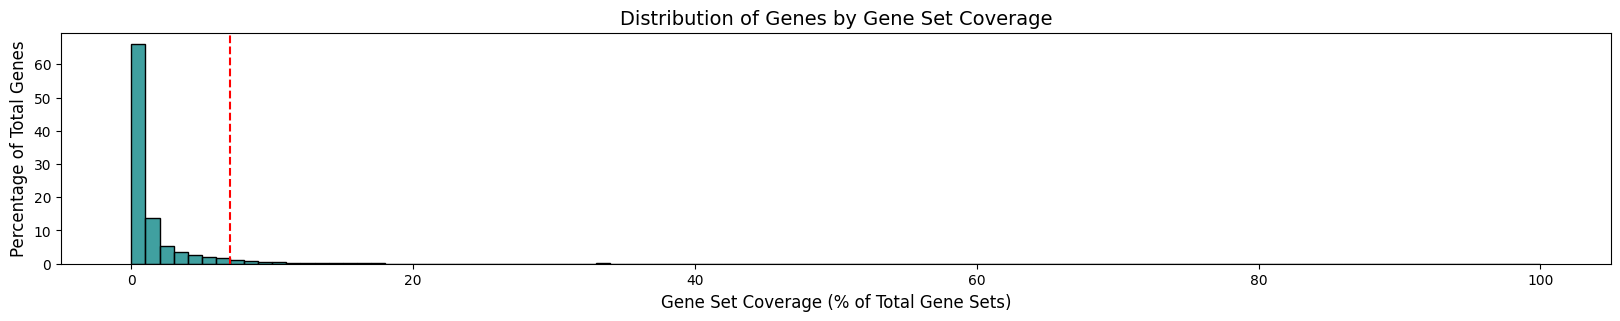

In [12]:
# Plot percentage of genes (y-axis) that appear in that percetage (x-axis) of genes sets
NUM_BINS = 100
bin_edges = np.linspace(0, 100, NUM_BINS + 1)

plt.figure(figsize=(20, 3))
sns.histplot(
    data=gene_frequency_df,
    x='geneset_percent',  
    bins=bin_edges,       # Define 10 bins for the X-axis (e.g., 0-10%, 10-20%, etc.)
    stat="percent",       # Y-axis shows the percentage of genes in each bin
    kde=False,
    color='teal',
    edgecolor='black',
)
plt.title('Distribution of Genes by Gene Set Coverage', fontsize=14)
plt.xlabel('Gene Set Coverage (% of Total Gene Sets)', fontsize=12)
plt.ylabel('Percentage of Total Genes', fontsize=12)
plt.axvline(x=MIN, color='red', linestyle='--', linewidth=1.5, label='Threshold')
plt.show()

# Save

In [13]:
gene_frequency_df.to_csv(config["data_paths"]["broad_positive_genes"], index=False)
df_genesets_cell_cycle.to_csv(config["data_paths"]["positive_genesets"], index=False)